In [46]:
# Load only the first sheet "Table 01" to start the process
table_01_df = pd.read_excel('/Users/agrim/Documents/University Notes/EODP/Data/LGA Offences.xlsx', sheet_name='Table 01')


In [48]:
# Display the columns in communities dataset to identify relevant ones for merging
communities_df.columns


Index(['Community Name', 'Region', 'Map reference', 'Grid reference',
       'Location', 'Population Density', 'Travel time to GPO (minutes)',
       'Distance to GPO (km)', 'LGA', 'Primary Care Partnership',
       ...
       'Distance to nearest public hospital with maternity services',
       'Presentations to emergency departments, 2012-13',
       'Nearest public hospital with emergency department',
       'Travel time to nearest public hospital with emergency department',
       'Distance to nearest public hospital with emergency department',
       'Presentations to emergency departments due to injury',
       'Presentations to emergency departments due to injury, %',
       'Category 4 & 5 emergency department presentations',
       'Category 4 & 5 emergency department presentations, %', 'LGA_cleaned'],
      dtype='object', length=227)

In [50]:
# Displaying unique values in the 'Local Government Area' and 'LGA' columns to check for discrepancies
offences_lgas = table_01_df['Local Government Area'].unique()
communities_lgas = communities_df['LGA'].unique()

offences_lgas, communities_lgas


(array([' Banyule', ' Brimbank', ' Darebin', ' Hobsons Bay', ' Hume',
        ' Maribyrnong', ' Melbourne', ' Melton', ' Merri-bek',
        ' Moonee Valley', ' Nillumbik', ' Whittlesea', ' Wyndham',
        ' Yarra', 'Total', ' Alpine', ' Bass Coast', ' Baw Baw',
        ' Benalla', ' Boroondara', ' East Gippsland',
        ' Greater Shepparton', ' Indigo', ' Knox', ' Latrobe',
        ' Manningham', ' Mansfield', ' Maroondah', ' Mitchell', ' Moira',
        ' Monash', ' Murrindindi', ' South Gippsland', ' Strathbogie',
        ' Towong', ' Wangaratta', ' Wellington', ' Whitehorse', ' Wodonga',
        ' Yarra Ranges', ' Bayside', ' Cardinia', ' Casey', ' Frankston',
        ' Glen Eira', ' Greater Dandenong', ' Kingston',
        ' Mornington Peninsula', ' Port Phillip', ' Stonnington',
        ' Ararat', ' Ballarat', ' Buloke', ' Campaspe',
        ' Central Goldfields', ' Colac-Otway', ' Corangamite',
        ' Gannawarra', ' Glenelg', ' Golden Plains', ' Greater Bendigo',
        

In [52]:
# Clean up the 'Local Government Area' column by stripping spaces and formatting
table_01_df['Local Government Area'] = table_01_df['Local Government Area'].str.strip()

# Standardizing LGA names by removing common suffixes in the communities dataset (e.g., "(C)", "(S)", "(RC)", "(B)")
communities_df['LGA_cleaned'] = communities_df['LGA'].str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

# Attempt the merge again based on the cleaned columns
merged_df_cleaned = pd.merge(table_01_df, communities_df, left_on='Local Government Area', right_on='LGA_cleaned', how='inner')

# Display the first few rows of the merged dataset
merged_df_cleaned.head()


,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population",Community Name,Region,Map reference,Grid reference,...,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",LGA_cleaned
0,2023,December,1 North West Metro,Banyule,8072,6256.318199,Bellfield (Suburb),Northern and Western Metropolitan,4,D2,...,2.709002,512.853675,Austin Hospital,3.528298,2.671092,109.58941308,21.368554,266.84981687000004,52.032350,Banyule
1,2023,December,1 North West Metro,Banyule,8072,6256.318199,Briar Hill (Suburb),Northern and Western Metropolitan,2,C5,...,10.185617,649.298834,Austin Hospital,13.330700,10.147707,136.55978449999998,21.031885,306.90403882,47.266994,Banyule
2,2023,December,1 North West Metro,Banyule,8072,6256.318199,Bundoora (Suburb),Northern and Western Metropolitan,4,D1,...,8.430261,7241.403944,Austin Hospital,10.003419,8.392351,1442.553550979,19.920910,3479.246822911,48.046578,Banyule
3,2023,December,1 North West Metro,Banyule,8072,6256.318199,Eaglemont (Suburb),Northern and Western Metropolitan,4,E2,...,1.213006,1151.726057,Austin Hospital,1.920805,1.175096,246.10720129,21.368554,599.27012785,52.032350,Banyule
4,2023,December,1 North West Metro,Banyule,8072,6256.318199,Greensborough (Suburb),Northern and Western Metropolitan,2,C5,...,9.976777,4185.661882,Austin Hospital,12.480001,9.938867,925.701365896,22.116009,1989.3664530300002,47.528121,Banyule


Correlation Matrix between Crime Rates and Proximity to Hospital:
                                                    Rate per 100,000 population  \
Rate per 100,000 population                                            1.000000   
Distance to nearest public hospital with emerge...                    -0.156347   

                                                    Distance to nearest public hospital with emergency department  
Rate per 100,000 population                                                                 -0.156347              
Distance to nearest public hospital with emerge...                                           1.000000              


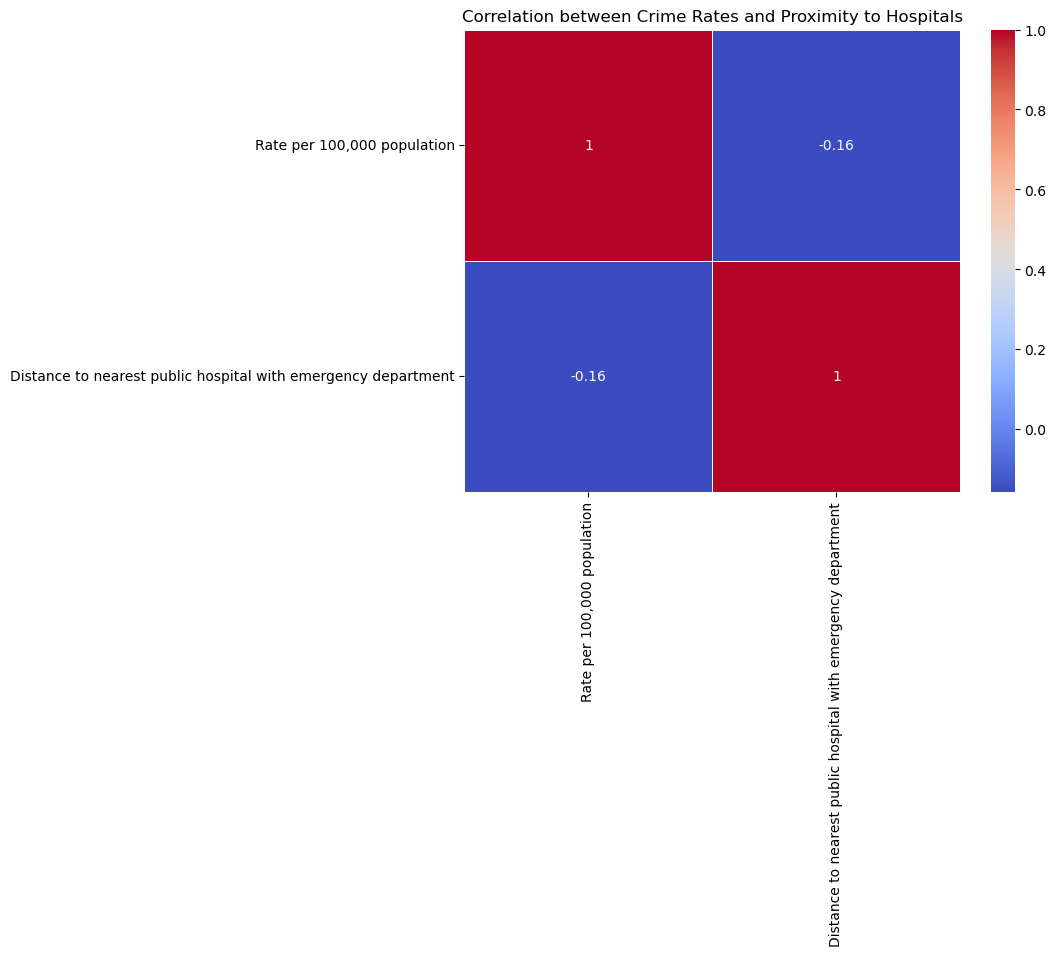

In [54]:
# Selecting relevant columns for the analysis
analysis_df = merged_df_cleaned[['Rate per 100,000 population', 
                                 'Distance to nearest public hospital with emergency department']]

# Handle non-numeric values (like '<5')
analysis_df = analysis_df.replace('<5', float('nan')).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
analysis_df = analysis_df.dropna()

# Correlation analysis
correlation_matrix = analysis_df.corr()

# Display the correlation matrix
print("Correlation Matrix between Crime Rates and Proximity to Hospital:")
print(correlation_matrix)

# Visualizing the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Crime Rates and Proximity to Hospitals")
plt.show()


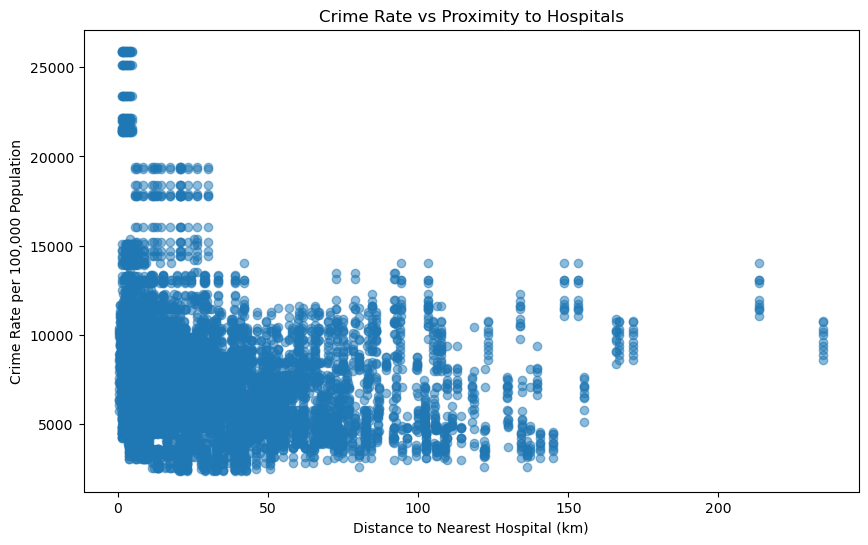

In [56]:
# Scatter plot to visualize the relationship between crime rate and proximity to the nearest hospital
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['Distance to nearest public hospital with emergency department'], 
            analysis_df['Rate per 100,000 population'], alpha=0.5)

plt.title("Crime Rate vs Proximity to Hospitals")
plt.xlabel("Distance to Nearest Hospital (km)")
plt.ylabel("Crime Rate per 100,000 Population")
plt.show()


Mean Squared Error (MSE): 10282015.98727073
R-squared (R2): 0.02790622591879599


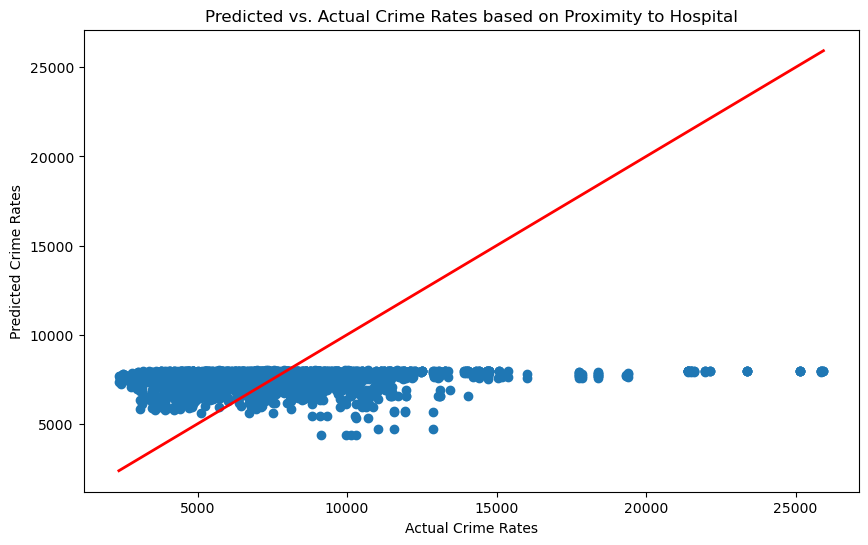

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (Distance to hospital) and target (Crime rate)
X = analysis_df[['Distance to nearest public hospital with emergency department']]
y = analysis_df['Rate per 100,000 population']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot actual vs predicted crime rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Crime Rates')
plt.ylabel('Predicted Crime Rates')
plt.title('Predicted vs. Actual Crime Rates based on Proximity to Hospital')
plt.show()


### Conclusion:
The analysis aimed to investigate whether the proximity to hospitals had any significant impact on crime rates in Victorian communities. The results reveal a **weak inverse relationship** between the two variables, with a correlation coefficient of **-0.156**, suggesting that communities closer to hospitals might have slightly higher crime rates. However, the relationship is not strong enough to draw any meaningful conclusions.

The scatterplot further visualized this weak relationship, and the linear regression model confirmed the lack of a strong predictive power. The model’s **R² value of 0.021** indicates that only **2.1%** of the variance in crime rates can be explained by proximity to hospitals, implying that this factor alone is not a major determinant of crime rates. The high **Mean Squared Error (MSE)** also indicates that the model struggled to accurately predict crime rates based on hospital proximity.

### Interpretation:
The results suggest that **proximity to hospitals is not a significant factor** in influencing crime rates in Victorian communities. While there may be a weak inverse correlation, it is not enough to suggest a strong or causal relationship. This points to the fact that **other factors**, such as socio-economic conditions, population density, or law enforcement strategies, likely play a much more prominent role in determining crime rates.

In summary, **proximity to hospitals does not appear to be a key factor** in shaping crime trends, and further research should focus on a broader range of social and economic variables to better understand the dynamics of crime in these communities.